In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [2]:
working_csv = df1 = pd.read_csv("psychroplanet.csv")     # 18 rows , 46 columns.
df2 = pd.read_csv("mesoplanet.csv")                      # 31 rows , 46 columns
df3 = pd.read_csv("non-habitable.csv")                   # 3820 rows , 46 columns

In [3]:
temp1 = df2.sample(n = 18 , replace = False)
temp2 = df3.sample(n = 18 , replace = False)

# This is to obtain a random sample of size 18 from the other two datasets and create a new dataset upon which 
# we will build the model.

In [4]:
working_csv = working_csv.append(temp1 , ignore_index = True)
working_csv = working_csv.append(temp2 , ignore_index = True)

# Don't run this cell over and over again , it will create a sample size greater than 54.

# Now in the variable working_csv we have a sample of size 54 (18 x 3) , giving a equal representation of all the
# classes. We have to build 500 such sample and run our models for 500 iterations over each sample.

In [5]:
print(len(working_csv))
working_csv.to_csv("working_csv.csv" , index = False)
#The output should always be 54 (Length or number of rows)

54


In [6]:
cols_at_end = ["P. Habitable Class"]
working_csv = working_csv[[c for c in working_csv if c not in cols_at_end] 
        + [c for c in cols_at_end if c in working_csv]]

cols = working_csv.columns
len(cols)


41

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.02386422 0.00977954 0.01832011 0.08004209 0.01096028 0.13652675
 0.07729127 0.01192704 0.01212963 0.00709877 0.         0.0047619
 0.07832584 0.01984977 0.00416667 0.00329435 0.01083774 0.
 0.01947461 0.09981374 0.02291575 0.00526316 0.04899639 0.01310813
 0.06646648 0.02497964 0.01094394 0.01280199 0.04198445 0.05120333
 0.         0.07287242 0.        ]


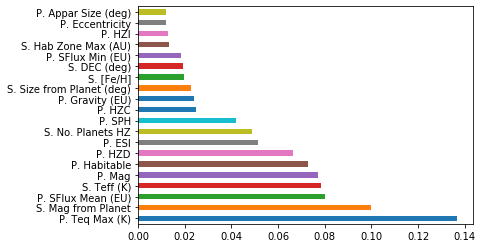

In [7]:
# Before bulding the model , we have 48 columns. We have to rank the columns in order of their influence of the
# on the class label.

#We are extracting the top 20 attributes that influence our classification here.

# Target variable : P. Habitable Class

X = working_csv.iloc[:,6:39]                             #Numeric columns
y = working_csv["P. Habitable Class"]                    #target column

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


In [8]:
imp_attributes = feat_importances.nlargest(20)
len(imp_attributes)

20

In [9]:
imp_attributes

P. Teq Max (K)               0.136527
S. Mag from Planet           0.099814
P. SFlux Mean (EU)           0.080042
S. Teff (K)                  0.078326
P. Mag                       0.077291
P. Habitable                 0.072872
P. HZD                       0.066466
P. ESI                       0.051203
S. No. Planets HZ            0.048996
P. SPH                       0.041984
P. HZC                       0.024980
P. Gravity (EU)              0.023864
S. Size from Planet (deg)    0.022916
S. [Fe/H]                    0.019850
S. DEC (deg)                 0.019475
P. SFlux Min (EU)            0.018320
S. Hab Zone Max (AU)         0.013108
P. HZI                       0.012802
P. Eccentricity              0.012130
P. Appar Size (deg)          0.011927
dtype: float64